In [2]:
.libPaths(c('/home/ssapkot/.conda/envs/r_env_360/lib', .libPaths()))

#install.packages("adegenet",repos='http://cran.us.r-project.org', dependencies = TRUE)
library(BGLR)
library(coda)
library(tidyverse)
library(ggplot2)
library(BMTME)
library(reshape2)

 setwd("/panicle/ssapkot/git_repo/GrainComp_GS/")
# load('/panicle/ssapkot/GrainComp/data/SAP_thinned.RData')
# ncol(X)
#load('data/SAP_BMTME.RData')

In [10]:
t <- rep(c('GrossEnergy_2015_TX','Protein_2015_TX','Starch_2015_TX'), times=10)
s <- rep(123:132,each=3)
ts <- cbind(t,s)
write.csv(ts, file='scripts/Design_File/BTx642_STSE_traits_seed3.txt',row.names=FALSE)

In [5]:
#load('/panicle/ssapkot/GrainComp/data/SAP_BMTME.RData')
load('data/BTx642_BMTME.RData')
pheno <- phenoBMTME
# colnames(pheno) <- gsub('Amylose','Ams',colnames(pheno))
# colnames(pheno) <- gsub('Gross_Energy','GE',colnames(pheno))
# colnames(pheno) <- gsub('Protein','Prt',colnames(pheno))
# colnames(pheno) <- gsub('Starch','Sta',colnames(pheno))
# colnames(pheno) <- gsub('20','',colnames(pheno))
# #colnames(pheno) <- gsub('_','',colnames(pheno))
# #colnames(pheno) <- gsub('Amylose','Ams',colnames(pheno))
traits <- colnames(phenoBME[,-1])
# colnames(pheno)

str(pheno)
#write.csv(pheno, 'data/SAP_GrainComp_Year.csv',row.names=FALSE)

'data.frame':	760 obs. of  9 variables:
 $ Taxa       : Factor w/ 190 levels "CS_001","CS_002",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ Year       : Factor w/ 2 levels "2014","2015": 1 1 2 2 1 1 2 2 1 1 ...
 $ Location   : Factor w/ 2 levels "SC","TX": 1 2 1 2 1 2 1 2 1 2 ...
 $ Env        : Factor w/ 4 levels "SC2014","SC2015",..: 1 3 2 4 1 3 2 4 1 3 ...
 $ Amylose    : num  1.936 0.644 1.627 1.751 1.818 ...
 $ Fat        : num  0.0382 0.5482 0.1975 0.4613 -0.4428 ...
 $ GrossEnergy: num  4.1 -2.63 -2.21 8.11 -5.55 ...
 $ Protein    : num  0.0212 -1.5873 -0.2574 -0.3997 -0.8115 ...
 $ Starch     : num  0.4551 1.7497 0.0947 0.1401 1.5723 ...


In [8]:
## Compile Cross Validation results from prediction using bayesian models
library(reshape2)

pop = 'BTx642'
method = 'STSE'
setwd(paste0('/scratch2/ssapkot/GrainComp/',pop,'/',method))

Accuracy <- c()
total_r = c()
for (j in 1:length(traits)){
        model = 'BRR'    
        trait = traits[j]
        fold_r <- c()
        setwd(paste0(trait))
      
        #setwd(paste0('/scratch2/ssapkot/GrainComp_GS/BRR_TPsize/',tp,'/',trait))
        for (k in 123:132){
            iter = k
            df = paste('Predictability_GBLUP',method,trait,iter,'CV5.csv',sep='_')
            if (file.exists(df))
                     df2 <- read.csv2(df, sep=",", TRUE, stringsAsFactor=FALSE)
            #print(df)
            fold_r = as.data.frame(cbind(method,trait,iter,df2[,1]))
                #str(fold_r)
            
            total_r = rbind(total_r,fold_r)
            }
            setwd('../')
        }
#colnames(total_r) <- c('Trait','r')
    #Accuracy <- seed_r %>% gather()
total_r <- as.data.frame(total_r)
total_r$r <- total_r$V4
head(total_r)
str(total_r)
df <- cbind(total_r[,1:2],str_split_fixed(total_r$trait, "_", 3), total_r[,3],as.numeric(levels(total_r[,5])[total_r[,5]]))
df <- cbind(df[,1:3],paste0(df[,5],df[,4]),df[,6:7])
colnames(df) <- c('Method','Trt_Env','Trait','Env','iter','r')
head(df)
write.csv(df,file = '/panicle/ssapkot/git_repo/GrainComp_GS/results/STSE/BTx642_STSE_CV5.csv',row.names=FALSE)

    setwd('/panicle/ssapkot/git_repo/GrainComp_GS/')
#     }
#     Acc  <- melt(Accuracy)
#     Acc$TPsize <- tp
    
#     total_acc <- total_acc %>% bind_rows(Acc)

#     setwd("../../")
#     }

#      #write.csv(Single_r,file = paste0('Predictability_',trait,'_single_r.csv'),row.names=FALSE)





method,trait,iter,V4,r
STSE,Amylose_2014_SC,123,0.701608331889003,0.701608331889003
STSE,Amylose_2014_SC,123,0.619112877361876,0.619112877361876
STSE,Amylose_2014_SC,123,0.677788466833652,0.677788466833652
STSE,Amylose_2014_SC,123,0.592282991149141,0.592282991149141
STSE,Amylose_2014_SC,123,0.638882486353149,0.638882486353149
STSE,Amylose_2014_SC,124,0.562773126984628,0.562773126984628


'data.frame':	1000 obs. of  5 variables:
 $ method: Factor w/ 1 level "STSE": 1 1 1 1 1 1 1 1 1 1 ...
 $ trait : Factor w/ 20 levels "Amylose_2014_SC",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ iter  : Factor w/ 10 levels "123","124","125",..: 1 1 1 1 1 2 2 2 2 2 ...
 $ V4    : Factor w/ 1000 levels "0.592282991149141",..: 5 2 4 1 3 6 9 10 8 7 ...
 $ r     : Factor w/ 1000 levels "0.592282991149141",..: 5 2 4 1 3 6 9 10 8 7 ...


Method,Trt_Env,Trait,Env,iter,r
STSE,Amylose_2014_SC,Amylose,SC2014,123,0.7016083
STSE,Amylose_2014_SC,Amylose,SC2014,123,0.6191129
STSE,Amylose_2014_SC,Amylose,SC2014,123,0.6777885
STSE,Amylose_2014_SC,Amylose,SC2014,123,0.5922830
STSE,Amylose_2014_SC,Amylose,SC2014,123,0.6388825
STSE,Amylose_2014_SC,Amylose,SC2014,124,0.5627731


In [29]:
## Compile Cross Validation results for BMORS prediction
library(reshape2)

pop = 'BTx642'
setwd('/panicle/ssapkot/git_repo/GrainComp_GS/results/BMORS/')
setwd(paste0(pop))

df = c()

for (k in 123:132){
        iter = k
        res <- c()
        setwd(paste0(iter))

        pm <- readRDS(file = paste0(pop,'_BMORS_',iter,'_CV5.rds'))
        res <- summary(pm, information='complete')
        print(res)
        df = rbind(total_r,res)

        setwd('../')
         }

df <- as.data.frame(df)
head(df)

#write.csv(df,file = '/panicle/ssapkot/git_repo/GrainComp_GS/results/BMORS/SAP_BMORS_CV-Env.csv',row.names=FALSE)

setwd('/panicle/ssapkot/git_repo/GrainComp_GS/')

   Environment       Trait Partition Pearson  MAAPE
1                  Amylose         1  0.7714 0.5927
2                  Amylose         2  0.6960     NA
3                  Amylose         3  0.7123 0.5800
4                  Amylose         4  0.6593 0.5834
5                  Amylose         5  0.7155 0.5336
6                      Fat         1  0.7095 0.6346
7                      Fat         2  0.7854     NA
8                      Fat         3  0.7396 0.6614
9                      Fat         4  0.7499 0.6310
10                     Fat         5  0.6879 0.6685
11             GrossEnergy         1  0.6203 0.6759
12             GrossEnergy         2  0.7254     NA
13             GrossEnergy         3  0.6040 0.7347
14             GrossEnergy         4  0.6733 0.6740
15             GrossEnergy         5  0.6905 0.7121
16                 Protein         1  0.7881 0.5975
17                 Protein         2  0.8214     NA
18                 Protein         3  0.6396 0.7324
19          

ERROR: Error in match.names(clabs, names(xi)): names do not match previous names


In [5]:
setwd('/panicle/ssapkot/git_repo/GrainComp_GS/')

In [4]:
## Compile Cross Validation results for BME prediction
library(reshape2)
#load('/panicle/ssapkot/GrainComp/data/SAP_BMTME.RData')
load('/panicle/ssapkot/git_repo/GrainComp_GS/data/BTx642_BMTME.RData')
traits <- colnames(phenoBMTME[,-c(1:4)])
traits

pop = 'BTx642'
method = 'BME'
setwd(paste0('/scratch2/ssapkot/GrainComp/',pop,'/',method))

Accuracy <- c()
total_r = c()
for (j in 1:length(traits)){   
        trait = traits[j]
        fold_r <- c()
      
        for (k in 123:132){
            iter = k
            df = paste0(pop,'_',trait,'_',iter,'_BME.csv')
            if (file.exists(df))
                     df2 <- read.csv2(df, sep=",", TRUE, stringsAsFactor=FALSE)
            #print(df)
            fold_r = as.data.frame(cbind(method,trait,iter,df2))
                #str(fold_r)
            
            total_r = rbind(total_r,fold_r)
            }
        }
total_r <- as.data.frame(total_r)
#total_r[total_r$Trait=='Gross_Energy2014',]
# str(total_r)
col <- as.data.frame(str_split_fixed(total_r$Trait, "_", 3))
head(col)

# #df <- cbind(total_r[,1:3],str_split_fixed(total_r$Trait, "_", 3), as.numeric(levels(total_r[,7])[total_r]))
df <- cbind(total_r[,c(1:3,5)],paste0(col$V3,col$V2),total_r[,7:8])
colnames(df) <- c('Method','Trait','Seed','Trt_Env','Env','Pearson','MAAPE')
tail(df)
write.csv(df,file = paste0('/panicle/ssapkot/git_repo/GrainComp_GS/results/BME/',pop,'_BME_CV5_complete.csv'),row.names=FALSE)

setwd('/panicle/ssapkot/git_repo/GrainComp_GS/')

[1] "Amylose"     "Fat"         "GrossEnergy" "Protein"     "Starch"

V1,V2,V3
Amylose,2014,SC
Amylose,2014,SC
Amylose,2014,SC
Amylose,2014,SC
Amylose,2014,SC
Amylose,2014,TX


,Method,Trait,Seed,Trt_Env,Env,Pearson,MAAPE
995,BME,Starch,132,Starch_2015_SC,SC2015,0.3535,0.7596
996,BME,Starch,132,Starch_2015_TX,TX2015,0.4472,0.7775
997,BME,Starch,132,Starch_2015_TX,TX2015,0.4889,0.7172
998,BME,Starch,132,Starch_2015_TX,TX2015,0.6473,0.6785
999,BME,Starch,132,Starch_2015_TX,TX2015,0.4135,0.7443
1000,BME,Starch,132,Starch_2015_TX,TX2015,0.5471,0.6326


In [8]:
write.csv(df,file = paste0('/panicle/ssapkot/git_repo/GrainComp_GS/results/BME/',pop,'_BME_CV5_complete.csv'),row.names=FALSE)

'data.frame':	995 obs. of  7 variables:
 $ Method : Factor w/ 1 level "BME": 1 1 1 1 1 1 1 1 1 1 ...
 $ Trait  : Factor w/ 5 levels "Amylose","Fat",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Seed   : int  123 123 123 123 123 123 123 123 123 123 ...
 $ Trt_Env: chr  "Amylose_2014_SC" "Amylose_2014_SC" "Amylose_2014_SC" "Amylose_2014_SC" ...
 $ Env    : Factor w/ 4 levels "SC2014","SC2015",..: 1 1 1 1 1 3 3 3 3 3 ...
 $ Pearson: num  0.466 0.707 0.381 0.695 0.677 ...
 $ MAAPE  : chr  "0.6925" "0.642" "0.7015" "0.67" ...


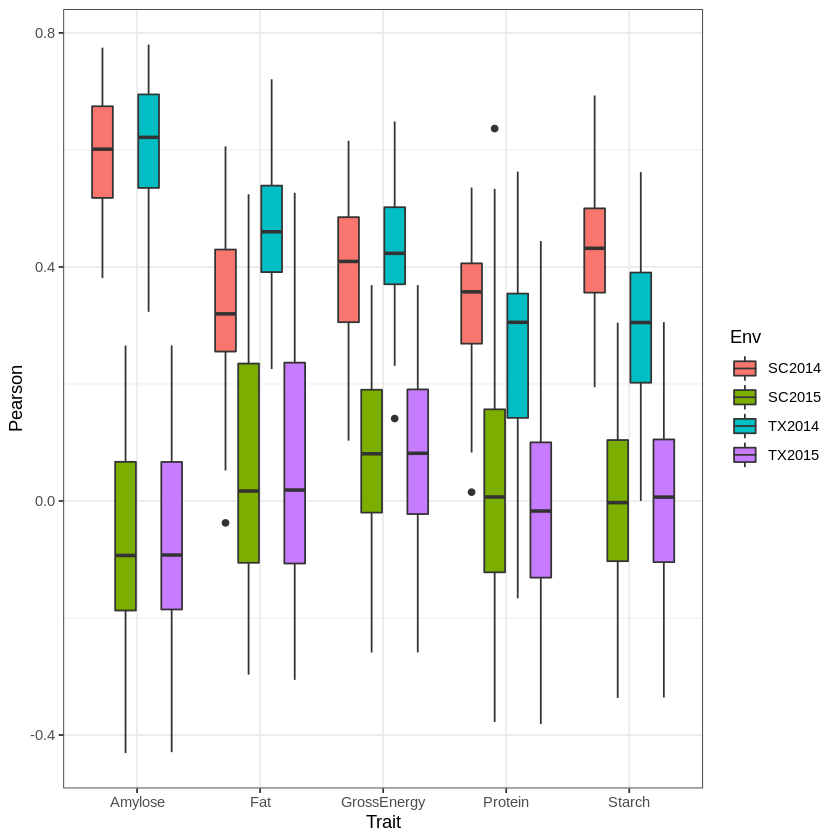

In [5]:

df$Pearson = as.numeric(df$Pearson)
str(df)
ggplot(df, aes(x=Trait, y=Pearson, fill = Env)) + geom_boxplot() + theme_bw()

In [33]:
## Compiling Dry basis with per grain for SAP STSE accuracy
db <- read.csv('results/STSE//SAP_CV5_STSE_DryBasis.csv',header=T)
pG <- read.csv('results/STSE/SAP_CV5_STSE_perGrain.csv',header=T)
db$Method <- 'DryBasis'
pG$Method <- 'PerGrain'

db$Env <- as.factor(db$Env)
pG$Env <- as.factor(pG$Env)
head(db)
head(pG)

df <- rbind(db,pG)
head(df)
#df <- df[,c(5,1,2,3,4)]

write.csv(df,'results/STSE//SAP_CV5_STSE_MethodsCompiled.csv',row.names=FALSE)
# png('results/STSE/SAP_STSE_DBvsPerGrain_accuracy.png', units='in',width=7,height=7, res=500)
# ggplot(df,aes(x=Env,y=r,fill=Method)) + geom_boxplot() + facet_wrap(Trait~., scale='free') + theme_bw() + labs(x='Year',y='Prediction Accuracy (r)')
# dev.off()

Method,Trt_Env,Trait,Env,iter,r
DryBasis,Amylose2013,Amylose,2013,123,0.1500014
DryBasis,Amylose2013,Amylose,2013,123,0.1350531
DryBasis,Amylose2013,Amylose,2013,123,0.3217240
DryBasis,Amylose2013,Amylose,2013,123,0.3254827
DryBasis,Amylose2013,Amylose,2013,123,0.1773646
DryBasis,Amylose2013,Amylose,2013,124,0.2266738


Method,Trt_Env,Trait,Env,iter,r
PerGrain,Amylose2013,Amylose,2013,123,0.5764798
PerGrain,Amylose2013,Amylose,2013,123,0.4721176
PerGrain,Amylose2013,Amylose,2013,123,0.4143311
PerGrain,Amylose2013,Amylose,2013,123,0.3763966
PerGrain,Amylose2013,Amylose,2013,123,0.5255733
PerGrain,Amylose2013,Amylose,2013,124,0.4657229


Method,Trt_Env,Trait,Env,iter,r
DryBasis,Amylose2013,Amylose,2013,123,0.1500014
DryBasis,Amylose2013,Amylose,2013,123,0.1350531
DryBasis,Amylose2013,Amylose,2013,123,0.3217240
DryBasis,Amylose2013,Amylose,2013,123,0.3254827
DryBasis,Amylose2013,Amylose,2013,123,0.1773646
DryBasis,Amylose2013,Amylose,2013,124,0.2266738


In [77]:
### Change Per Grain phenoBME to phenoBMTME
df <- read.csv('data/SAP_perGrainComp_BME.csv')
#head(df)
df.m <- melt(df)
t_y <- str_split_fixed(df.m$variable, "20", 2)
df.m <- as.data.frame(cbind(as.character(df.m[,1]),t_y[,1],paste0('20',t_y[,2]), as.numeric(df.m[,3])))
colnames(df.m) <- c('Taxa','Trait','Env','value')

df2 <- df.m %>% spread(Trait, value)
head(df2)
phenoBMTME <- as.data.frame(cbind(df2[,1:2], as.data.frame(lapply(df2, function(x) as.numeric(levels(x))[x]))))
    phenoBMTME <- phenoBMTME[,-c(3,4)]
str(phenoBMTME)


Using Taxa as id variables


Taxa,Env,Amylose,Fat,Gross_Energy,Protein,Starch
PI152651,2013,-0.0193329502379298,0.00290569403381205,4.94415149698468,-0.0158911872343525,0.185134065408357
PI152651,2014,-0.0200533273836313,-0.00774225348075547,-7.6448496238418,-0.069491733364629,-0.0235685818531843
PI152651,2017,0.143677558556838,0.0305117879065995,37.8665553457038,0.148861446501876,0.535556471847137
PI17548,2013,-0.0592278438751594,-0.000665861251450286,-21.4999937023788,-0.0714659515071727,-0.39637474506505
PI17548,2014,-0.04278519020079,-0.00518871040205292,-19.8112804687579,-0.0795945562110937,-0.372303434948823
PI17548,2017,-0.0174610460607449,-0.00469179987244389,-17.3341452265513,-0.0410503085324143,-0.37447209724922


Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

'data.frame':	1167 obs. of  7 variables:
 $ Taxa        : Factor w/ 389 levels "PI152651","PI17548",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ Env         : Factor w/ 3 levels "2013","2014",..: 1 2 3 1 2 3 1 2 3 1 ...
 $ Amylose     : num  -0.0193 -0.0201 0.1437 -0.0592 -0.0428 ...
 $ Fat         : num  0.002906 -0.007742 0.030512 -0.000666 -0.005189 ...
 $ Gross_Energy: num  4.94 -7.64 37.87 -21.5 -19.81 ...
 $ Protein     : num  -0.0159 -0.0695 0.1489 -0.0715 -0.0796 ...
 $ Starch      : num  0.1851 -0.0236 0.5356 -0.3964 -0.3723 ...


Environment,Trait,Pearson,MAAPE
SC,Amylose,0.7473,NA
SC,Fat,0.7413,NA
SC,GrossEnergy,0.6624,NA
SC,Protein,0.7106,NA
SC,Starch,0.6676,NA
TX,Amylose,0.7744,0.6285
TX,Fat,0.7807,0.9564
TX,GrossEnergy,0.6915,0.7275
TX,Protein,0.7100,0.7384
TX,Starch,0.6463,0.7343


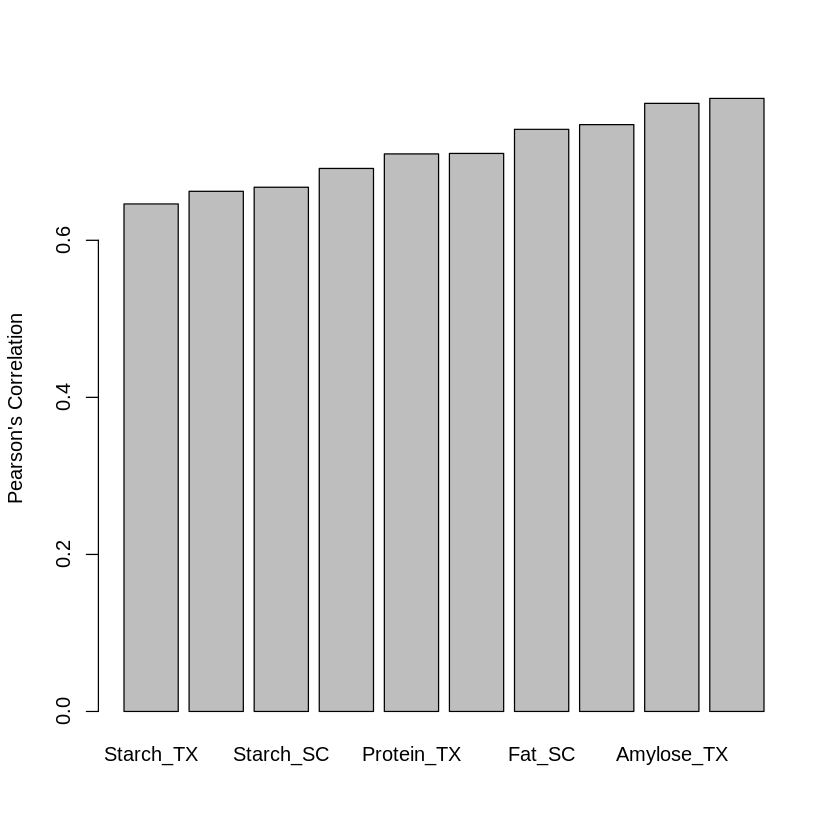

In [25]:
pm = readRDS('results//BMORS//BTx642/CV-Loc2/BTx642_BMORS_CV-Loc2.rds')
res = summary(pm)
barplot(pm)
res
write.csv(res, file='results/BMORS/BTx642_BMORS_CV-Loc2.csv',row.names=F)

In [79]:
save(phenoBME,phenoBMTME, geno, file='data/SAP_BMTME_pGrain.RData')

In [ ]:
pm = readRDS('/scratch2/ssapkot/GrainComp/SAP/BME/')

In [22]:
tag = read.csv("PredictiveAbility_TagSNPs_markerDensity_Bayesian.csv",header=TRUE)
tag$Marker_Density <- as.factor(tag$Marker_Density)
str(tag)

'data.frame':	1080 obs. of  4 variables:
 $ Trait         : Factor w/ 3 levels "Cal.g","Protein",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Marker_Density: Factor w/ 4 levels "100","1000","5000",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ variable      : Factor w/ 3 levels "BayesB","BayesC",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ value         : num  0.564 0.585 0.588 0.572 0.596 ...


In [24]:
png("../GS/Predictive_Ability_MarkerDensity_TagSNPs.png", units="in",width=8,height=4, res=500)
ns <- ggplot(tag, aes(x=Marker_Density, y=value, fill=variable)) + geom_boxplot() + facet_wrap(~Trait) + scale_x_discrete() 
ns <- ns + theme_bw() + theme(legend.title=element_blank(),legend.position= "top", axis.text.x = element_text(angle = 45, hjust = 1)) 
ns + labs(x="Number of SNPs", y="Predictive ability (r)")
dev.off()

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

png 
  2

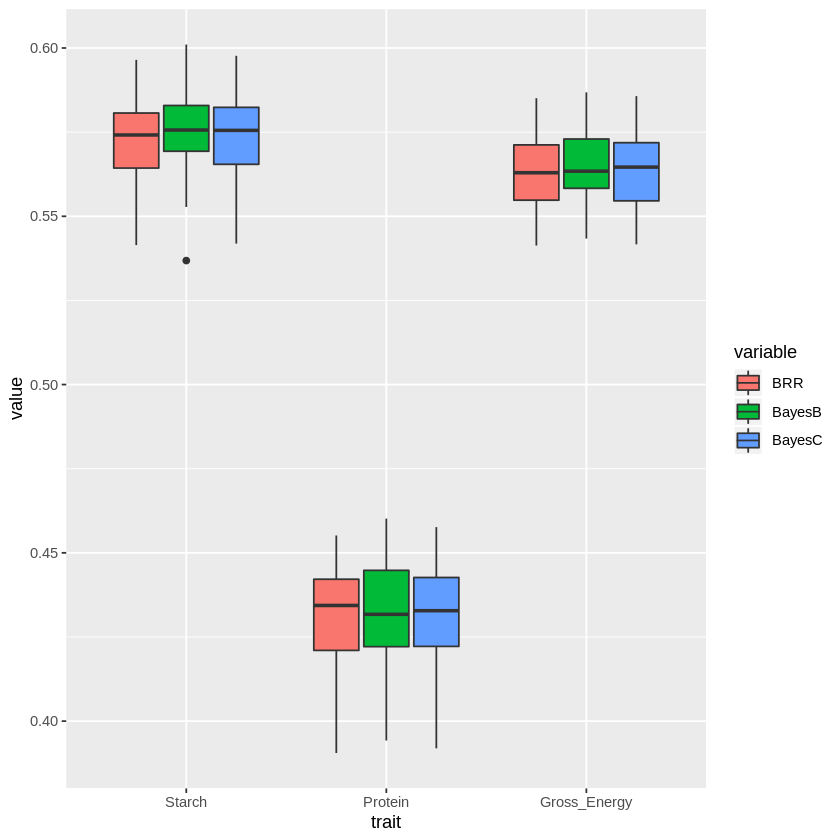

In [23]:
ggplot(df.m, aes(x=trait, y=value, fill=variable)) + geom_boxplot()

In [3]:
mEff <- read.csv("getVariances/Starch/MarkerEffects_Starch_allModels.csv", header=T)
head(mEff)
mEff$marker <- as.factor(mEff$marker)
str(mEff)
mE.m<- melt(mEff)
head(mE.m)
#bHat <- mEff[,5]
#png("results/plots/BL_Starch_markerEff.png", units="cm", width=20, height=10, res=500)
#ggplot(mE.m, aes(x=marker, y=value^2)) + geom_bar(stat="identity") + facet_grid(mE.m$variable) + labs(xlab="", ylab="MarkerEffect")
#dev.off()

marker,BRR,BayesA,BayesB,BL,BayesC
1,-0.0001599585,8.741657e-05,0.0001470434,3.407325e-04,7.035415e-05
2,0.0003004653,7.105949e-05,-0.0000107388,1.718735e-05,1.516219e-04
3,0.0002711588,5.839689e-05,-0.0006091970,-2.880045e-04,3.206817e-04
4,-0.0002222747,-3.176340e-04,-0.0002593876,6.437098e-05,5.241354e-04
5,0.0002052291,-5.680444e-05,-0.0001770794,1.731351e-04,3.040611e-04
6,0.0005341474,3.351822e-04,0.0009873262,3.985921e-04,8.340259e-04


'data.frame':	224007 obs. of  6 variables:
 $ marker: Factor w/ 224007 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ BRR   : num  -0.00016 0.0003 0.000271 -0.000222 0.000205 ...
 $ BayesA: num  8.74e-05 7.11e-05 5.84e-05 -3.18e-04 -5.68e-05 ...
 $ BayesB: num  1.47e-04 -1.07e-05 -6.09e-04 -2.59e-04 -1.77e-04 ...
 $ BL    : num  3.41e-04 1.72e-05 -2.88e-04 6.44e-05 1.73e-04 ...
 $ BayesC: num  7.04e-05 1.52e-04 3.21e-04 5.24e-04 3.04e-04 ...


ERROR: Error in melt(mEff): could not find function "melt"


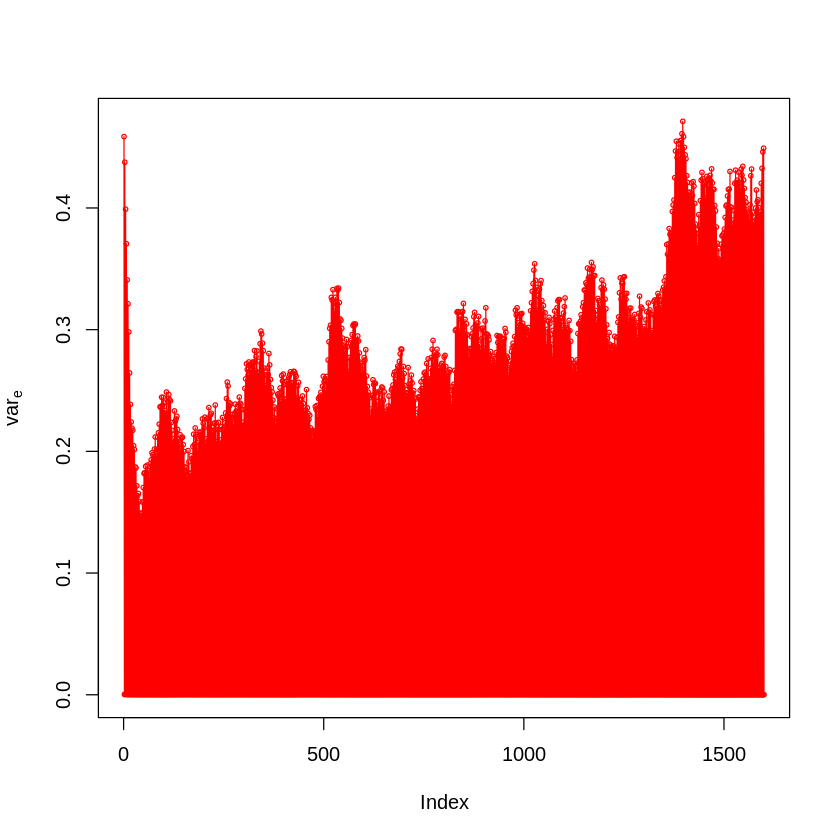

In [6]:
# bHat <- fm$ETA[[1]]$b
# length(bHat)

plot(bHat^2,type='o', col=4,cex=.5,ylab='Estimated Squared-Marker Effect')
varE = scan("Starch/BayesC/BayesC_ETA_1_b.bin")
plot(varE,type='o', col=2,cex=.5,ylab=expression(var[e]));
# abline(h=fm$varE, col=4, lwd=2);
# abline(v=fm$burnIn/fm$thin,col=4)

# lambda<-scan('Starch/BL/BL_ETA_1_lambda.dat')
# plot(lambda,type='o',col=2,cex=.5,ylab=expression(lambda));
# abline(h=fm$ETA[[3]]$lambda,col=4,lwd=2);
# abline(v=fm$burnIn/fm$thin,col=4)

In [2]:
fat_bayes <- read.csv("Fat/MarkerEffects_Fat_allModels.csv", header=T)

head(fat_bayes)


marker,BRR,BayesA,BayesB,BL,BayesC
1,-5.832819e-05,-8.236720e-05,3.292959e-04,2.866343e-05,8.143269e-06
2,2.292304e-05,-1.435791e-05,3.946182e-05,2.030172e-05,1.922765e-05
3,-1.645703e-04,1.317635e-05,2.968779e-05,2.323573e-05,-6.418645e-05
4,1.904881e-05,-9.370607e-05,1.254912e-04,-4.652489e-05,4.862477e-05
5,4.130597e-05,-6.088834e-06,1.475940e-04,8.352828e-05,-2.620735e-06
6,-1.256961e-04,-9.636549e-05,-2.927617e-06,-1.787352e-05,-6.935286e-05


In [9]:
## Compile all predictions by models
setwd("/panicle/ssapkot/GrainComp/results/accuracy/Prediction_0716/")
models = c("BRR","BL","BayesA", "BayesB")
traits = c("Starch","Protein","Cal.g")
Total = c()
for (i in 1:length(models)){
    model = models[i]
    Pred = rep(model,31)
    setwd(paste0(model))
    for (j in 1:length(traits)){
        trait = traits[j]
        accuracy = c()
        df = read.csv(file=paste0("Pred_Acc_",trait,"_Test.csv"), header=TRUE)
        accuracy <- df[,2]
        Pred <- cbind(Pred,accuracy)
        }
    setwd("../")
    Total <- rbind(Total, Pred)
    colnames(Total) <- c("Model",traits)
    }
write.csv(Total, "/panicle/ssapkot/git_repo/GrainComp_SAP/results/Accuracy_Bayesian_Test_final.csv", row.names=FALSE)

Using Model as id variables


'data.frame':	154 obs. of  4 variables:
 $ Model  : Factor w/ 5 levels "BayesA","BayesB",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Starch : num  0.574 0.63 0.583 0.725 0.655 ...
 $ Protein: num  0.428 0.483 0.544 0.516 0.558 ...
 $ Cal.g  : num  0.507 0.664 0.703 0.563 0.723 ...


Model,variable,value
BRR,Starch,0.5739730
BRR,Starch,0.6297878
BRR,Starch,0.5825589
BRR,Starch,0.7247919
BRR,Starch,0.6554219
BRR,Starch,0.5442297


Warning message:
“Computation failed in `stat_compare_means()`:
missing value where TRUE/FALSE needed”

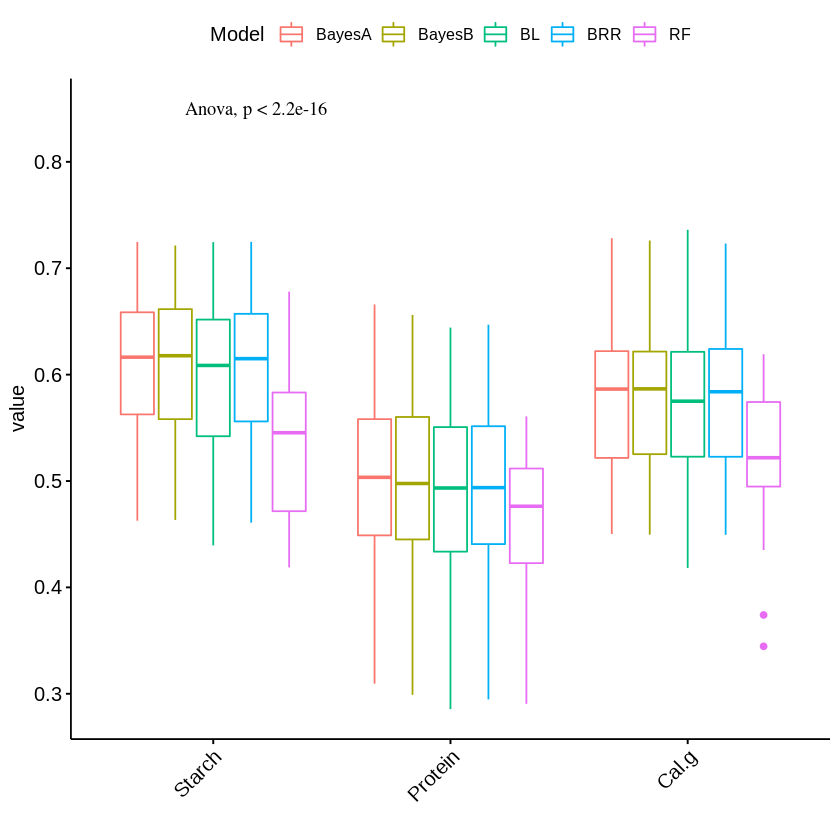

In [15]:
library(reshape2)
library(ggplot2)
df = read.csv("/panicle/ssapkot/git_repo//GrainComp_SAP/results/CV_Accuracy_Models_Test_final.csv",  header=T)
df.m = melt(df)

str(df)
head(df.m)

ns <- ggboxplot(df.m, x= "variable", y = "value", color= "Model", add="none", xlab= "") + rotate_x_text(angle = 45) + 
  #geom_hline(yintercept = mean(df.m$value), linetype = 2) +  # Add horizontal line at base mean
  stat_compare_means(method = "anova", label.y = .85, family = "Times New Roman") +        # Add global anova p-value
  stat_compare_means(label = "p.signif", method = "t.test", label.y = 1, ref.group = "BRR", hide.ns = TRUE) + facet_wrap(df.m$variable)   # Pairwise comparison against Mixed
#ns <- ns + theme_bw() + theme(text=element_text(size=10,family="Times New Roman"), panel.border = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))
ns
#ns + theme(legend.position="none")
#dev.off()

#ggplot(df.m, aes(x=variable, y=value, fill=Model)) + geom_boxplot()

PI,PC1,PC2,PC3,PC4,PC5,race
PI152651,11.446416,5.509076,-9.867469,16.181908,9.850063,caudatum
PI17548,-32.652390,-2.480208,9.551408,-24.292137,29.146336,kaffir
PI24969,-8.466498,50.195750,-20.879309,2.823848,-38.089040,durra
PI329435,2.972495,-15.014031,1.372640,-9.154624,-9.035015,mixed
PI329440,-19.310541,-13.741466,-13.301622,-6.212280,-15.446657,kaffir
PI34911,39.726450,-8.802395,-15.073802,9.632740,12.519173,caudatum


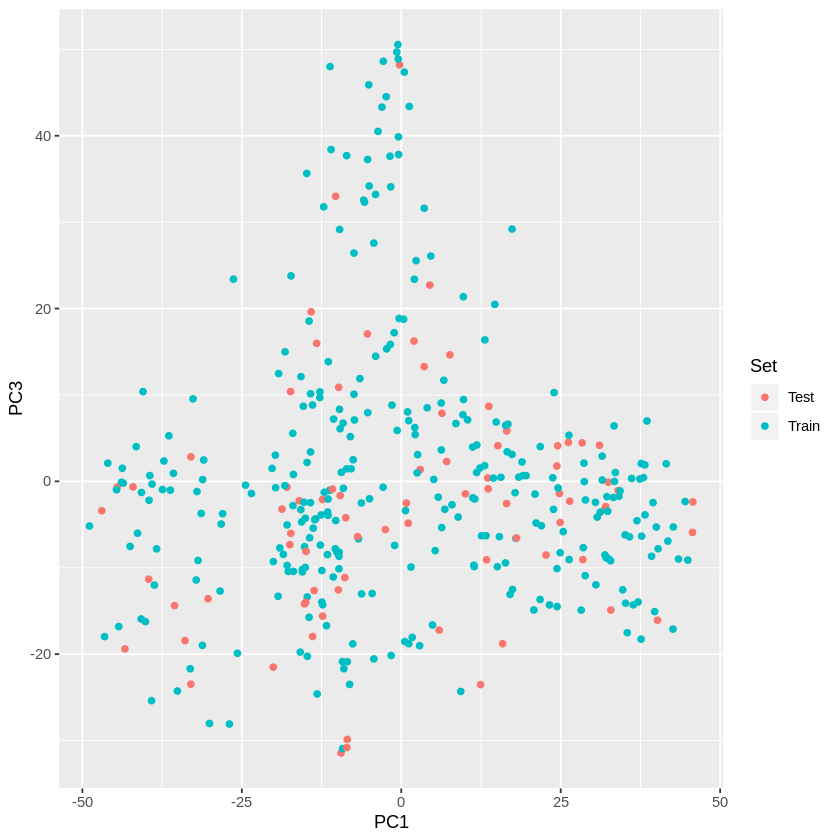

In [18]:
### PCA for sample seeds for training and testing

k = 123:152
n = 389
PCA = read.csv("data/PCA_SAP.csv", header=TRUE)
head(PCA)
set.seed(133)
test = sample(1:n, size = round(n/5), replace = FALSE)

PCA$Set = NA
PCA$Set[test] = "Test"
PCA$Set[-test] = "Train"

ggplot(PCA, aes(x=PC1, y = PC3, color=Set)) + geom_point()


In [5]:
traits <- c('Amylose','Fat','Starch','Gross_Energy','Protein')
models <- c('BRR','BayesA','BayesB','BayesC','BL')
setwd('getVariances/RILs/')
Total_dic <- c()
for (i in 1:length(traits)){
    trait <- traits[i]
    trait_dic <- c()
    setwd(paste0(trait))
    for (j in 1:length(models)){
        model <- models[j]
        setwd(paste0(model))
        fm = readRDS(paste('fm_ParReg',trait, model,'variance.rda', sep="_"))
        trait_dic <- rbind(trait_dic,fm$fit$DIC)
        setwd('../')
    }
    Total_dic <- cbind(Total_dic,trait_dic)
    setwd('../')
}

colnames(Total_dic) <- traits
rownames(Total_dic) <- models
Total_dic


,Amylose,Fat,Starch,Gross_Energy,Protein
BRR,755.8780,32.56432,455.2869,1673.963,291.3197
BayesA,710.4689,31.55533,458.1533,1672.650,289.9583
BayesB,710.7977,31.64674,453.6957,1672.645,291.2959
BayesC,756.0144,32.18031,458.4807,1674.873,293.4752
BL,753.9967,29.03066,465.6957,1660.399,295.9094


In [7]:
write.csv(Total_dic, file = 'DIC_BTX642_models.csv', row.names=T)

In [9]:
str(fm)

List of 21
 $ y            : num [1:190] -0.583 -0.366 0.832 -0.565 -1.134 ...
 $ a            : NULL
 $ b            : NULL
 $ whichNa      : int(0) 
 $ saveAt       : chr "/panicle/ssapkot/GrainComp/getVariances/RILs/Protein/BL/"
 $ nIter        : num 25000
 $ burnIn       : num 15000
 $ thin         : num 1
 $ weights      : num [1:190] 1 1 1 1 1 1 1 1 1 1 ...
 $ verbose      : logi FALSE
 $ response_type: chr "gaussian"
 $ df0          : num 5
 $ S0           : num 1.49
 $ yHat         : num [1:190] -0.404 -0.46 0.294 -0.34 -0.494 ...
 $ SD.yHat      : num [1:190] 0.25 0.243 0.27 0.253 0.246 ...
 $ mu           : num 0.0583
 $ SD.mu        : num 0.0643
 $ varE         : num 0.206
 $ SD.varE      : num 0.0225
 $ fit          :List of 4
  ..$ logLikAtPostMean: num -88.8
  ..$ postMeanLogLik  : num -118
  ..$ pD              : num 59.1
  ..$ DIC             : num 296
 $ ETA          :List of 1
  ..$ :List of 15
  .. ..$ model      : chr "BL"
  .. ..$ Name       : chr "ETA_1"
  .. ..$ 